In [59]:
# Imports
import time
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

fontsize = 14
ticklabelsize = 14

In [23]:
labels = ['setosa', 'versicolor', 'virginica']

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(len(df))
df.head()

150


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### Extração e Transformação de Dados

In [25]:
# Imprima os valores numéricos da Variável target (o que queremos prever), 
# uma de 3 possíveis categorias de plantas: setosa, versicolor ou virginica
print(labels[iris.target[5]])
iris.target

setosa


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
# Imprima os valores numéricos da Variável target (o que queremos prever), 
# uma de 3 possíveis categorias de plantas: 0, 1 ou 2
print(iris.target[5])

0


In [27]:
# Adicione ao dataset uma nova coluna com os nomes das espécies, 
# pois é isso que vamos tentar prever (variável target)
df_labeled = df.copy()
df_labeled['label'] = [ labels[i] for i in iris.target ]
df_labeled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
# Inclua no dataset uma coluna com os valores numéricos da variável target
df_labeled['target'] = iris.target
df_labeled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [30]:
# Extraia as features (atributos) do dataset e imprima
list(df_labeled)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'label',
 'target']

In [31]:
# Calcule a média de cada feature para as 3 classes
grouped = df_labeled.groupby('target')['sepal length (cm)', 'sepal width (cm)', 
                               'petal length (cm)', 'petal width (cm)'].mean()

grouped.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


### Exploração de Dados

In [32]:
# Imprima uma Transposta do dataset (transforme linhas e colunas e colunas em linhas)
df_t = df_labeled.T
df_t.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
sepal length (cm),5.1,4.9,4.7,4.6,5,5.4,4.6,5,4.4,4.9,...,6.7,6.9,5.8,6.8,6.7,6.7,6.3,6.5,6.2,5.9
sepal width (cm),3.5,3,3.2,3.1,3.6,3.9,3.4,3.4,2.9,3.1,...,3.1,3.1,2.7,3.2,3.3,3,2.5,3,3.4,3
petal length (cm),1.4,1.4,1.3,1.5,1.4,1.7,1.4,1.5,1.4,1.5,...,5.6,5.1,5.1,5.9,5.7,5.2,5,5.2,5.4,5.1
petal width (cm),0.2,0.2,0.2,0.2,0.2,0.4,0.3,0.2,0.2,0.1,...,2.4,2.3,1.9,2.3,2.5,2.3,1.9,2,2.3,1.8
label,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,setosa,...,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica,virginica


In [33]:
# Utilize a função Info do dataset para obter um resumo sobre o dataset
df_labeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
label                150 non-null object
target               150 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [34]:
# Faça um resumo estatístico do dataset
df_labeled.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [40]:
# Verifique se existem valores nulos no dataset
df_labeled.isnull().values.any()

False

In [41]:
# Faça uma contagem de valores de sepal length
df_labeled['sepal length (cm)'].sum()

876.5

### Plot

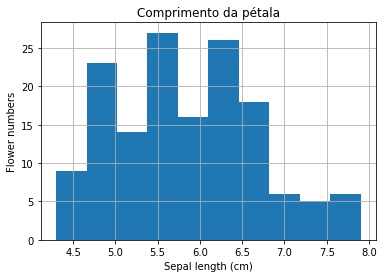

In [66]:
# Crie um Histograma de sepal length
df_labeled['sepal length (cm)'].hist()
plt.xlabel('Sepal length (cm)')
plt.ylabel('Flower numbers')
plt.title('Comprimento da pétala')
plt.show()

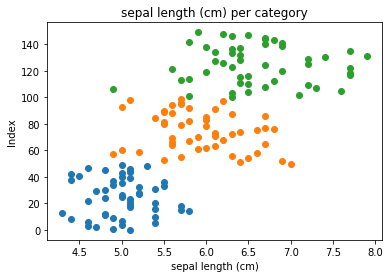

In [56]:
# Crie um Gráficos de Dispersão (scatter Plot) da variável sepal length versus número da linha, 
# colorido por marcadores da variável target
groups = df_labeled.groupby('target')

fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['sepal length (cm)'], group.index, marker='o', linestyle='')
plt.xlabel('sepal length (cm)')
plt.ylabel('Index')
plt.title('sepal length (cm) per category')
plt.show()

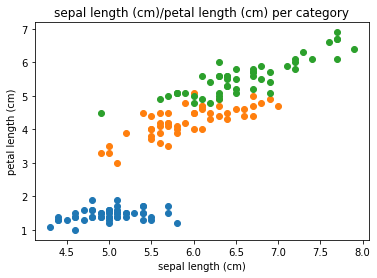

In [57]:
# Crie um Scatter Plot de 2 Features (atributos)
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['sepal length (cm)'], group['petal length (cm)'], marker='o', linestyle='')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title('sepal length (cm)/petal length (cm) per category')
plt.show()

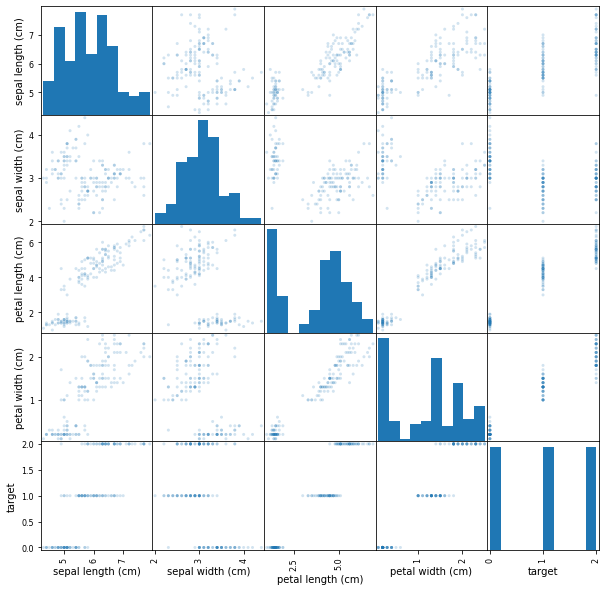

In [60]:
# Crie um Scatter Matrix das Features (atributos)
scatter_matrix(df_labeled, alpha=0.2, figsize=(10,10))
plt.show()

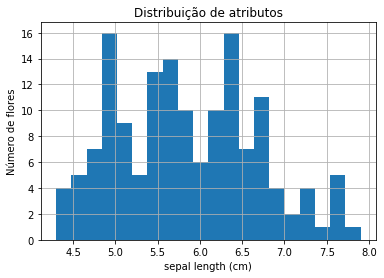

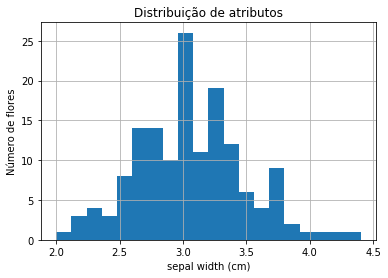

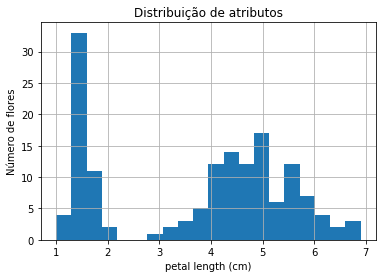

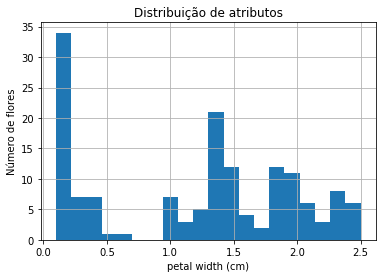

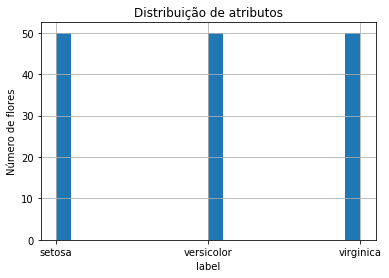

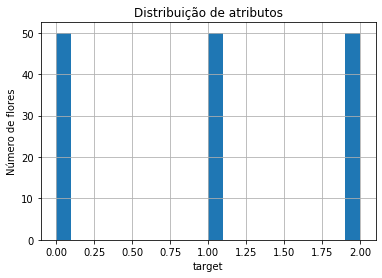

In [65]:
# Crie um Histograma de todas as features
for attr in df_labeled:
    df_labeled[attr].hist(bins=20, )
    plt.xlabel(attr)
    plt.ylabel("Número de flores")
    plt.title("Distribuição de atributos")
    plt.show()